### Dataset description =<br>

- The dataset contains several columns which are as follows -

  - age : age in years
  - sex : (1 = male; 0 = female)
  - cp : chest pain type
  - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
  - chol : serum cholestoral in mg/dl
  - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - restecg : resting electrocardiographic results
  - thalach : maximum heart rate achieved
  - exang : exercise induced angina (1 = yes; 0 = no)
  - oldpeak : ST depression induced by exercise relative to rest
  - slope : the slope of the peak exercise ST segment
  - ca : number of major vessels (0-3) colored by flourosopy
  - thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
  - target : 1 or 0

#  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import os
plt.style.use('bmh')

##  Load Data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.shape)

(303, 14)


In [5]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


##  Data Analysis

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


####  points about dataset  =<br>


- sex is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

- Same is the case with several other variables - fbs, exang and target.

- fbs (fasting blood sugar) should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

- exang (exercise induced angina) should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

- target should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Analysis of  target  feature variable =<br>


- Our feature variable of interest is target.

- It refers to the presence of heart disease in the patient.

- It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- So, in this section, I will analyze the target variable. 


In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

the unique values are 1 and 0. (1 stands for presence of heart disease and 0 for absence of hear disease).

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64


- 1 stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, 0 stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- We can visualize this information below.

# Data Visualization

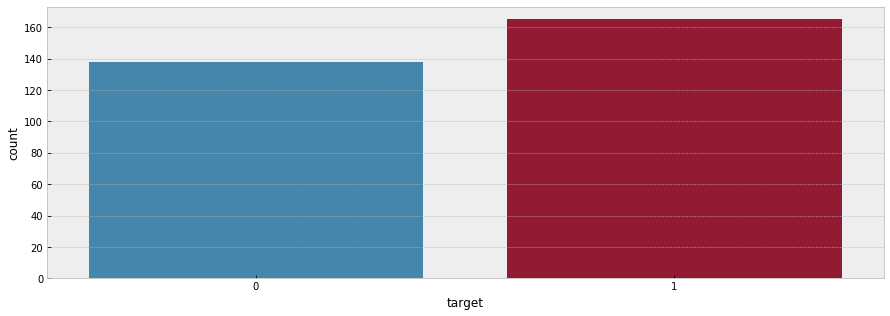

In [10]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="target", data=df)
plt.show()

  - There are 165 patients suffering from heart disease, and 
   
   - There are 138 patients who do not have any heart disease.

In [11]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

- sex variable contains two integer values 1 and 0 : (1 = male; 0 = female).

- target variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

-  So, out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

- We can visualize this information below.


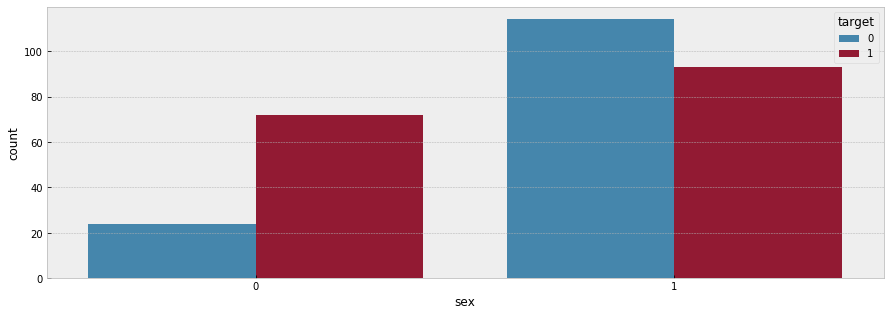

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

- Out of 96 females - 72 have heart disease and 24 do not have heart disease.
   
 - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.<br>
According to this  dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all


In [13]:
df['cp'].nunique()

4

In [14]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

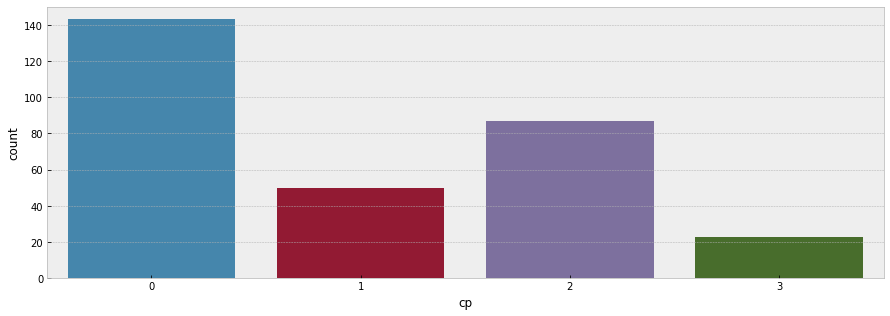

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="cp", data=df)
plt.show()

In [16]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

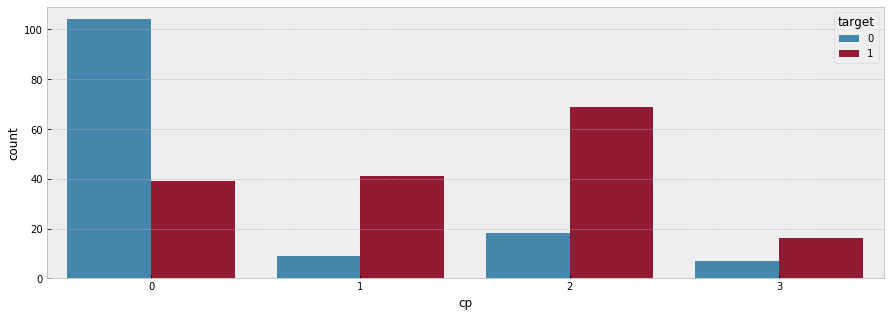

In [17]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

There are four types of chest pain: asymptomatic angina, atypical angina, atypical angina and typical angina. It is found that most heart patients have chest pain without symptoms. This group of people may exhibit atypical symptoms such as indigestion, the flu, or tension in the chest muscles. An asymptomatic attack, like any heart attack, involves blockage of blood flow to your heart and possible damage to the heart muscle.

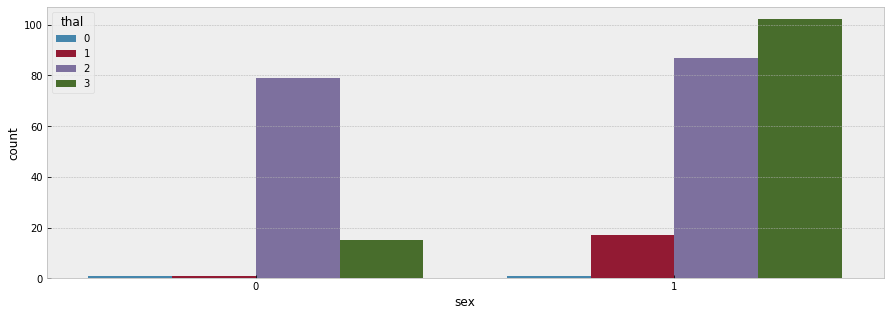

In [18]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="sex", hue="thal", data=df)
plt.show()

The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.

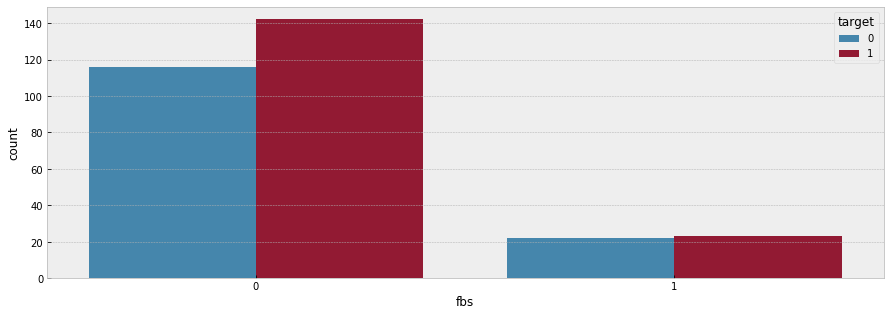

In [19]:
f, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="fbs", hue="target", data=df)
plt.show()

Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient

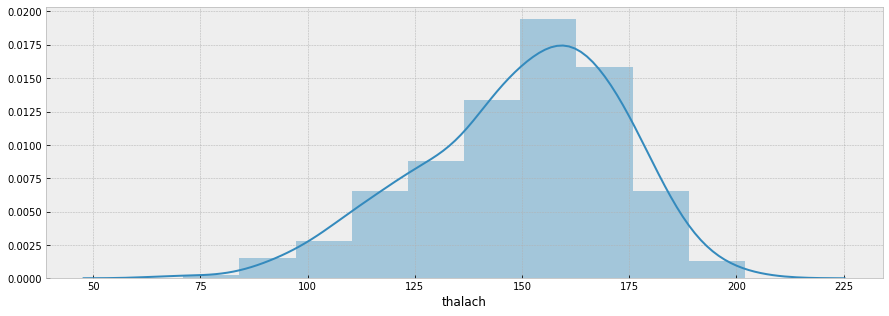

In [20]:
f, ax = plt.subplots(figsize=(15,5))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

We can see that the thalach variable is slightly negatively skewed.

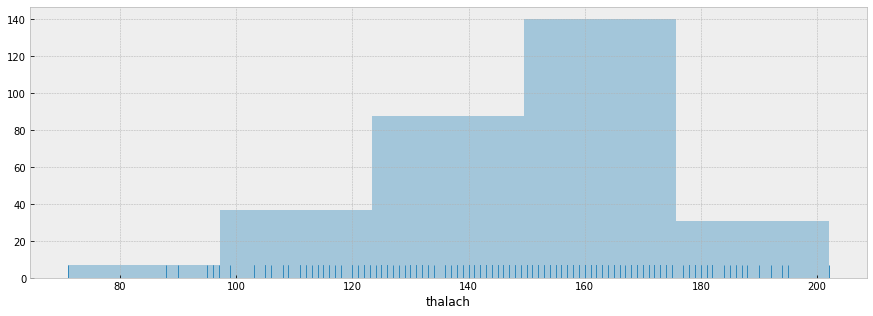

In [21]:
f, ax = plt.subplots(figsize=(15,5))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=5)
plt.show()

We can conclude that the distribution is somewhat skewed. Heart rate builds up in periods,<br>
If you are 25 years old: between 100-170 beats per minute<br>
At age 30: 95 to 162 beats per minute<br>
35 years: 93 to 157 beats per minute<br>
At age 40: 90 to 153 beats per minute<br>
45 years old: 88 to 149 beats per minute<br>
Age 50: Your heart rate ranges from 85 to 145 per minute<br>
Fifty-five years: between 83-140 beats per minute<br>
Age 60: Between 80 and 136 bpm<br><br>
65 years: 78 to 132 bpm<br>
Age 70 and older: 75 - 128 beats per minute.<br>

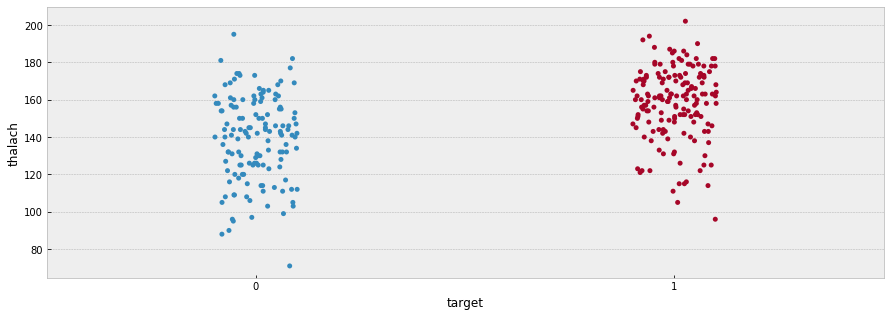

In [22]:
f, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as <br>compared to people who are not suffering from heart disease (target = 0).

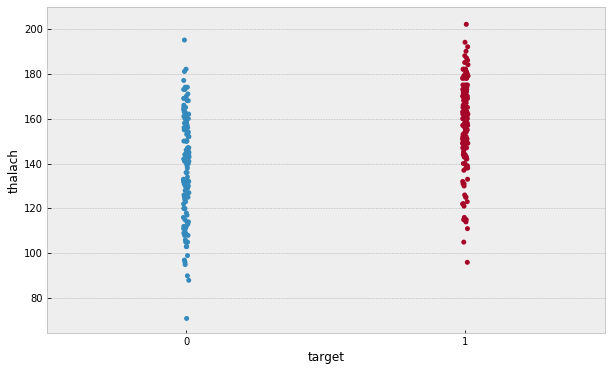

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

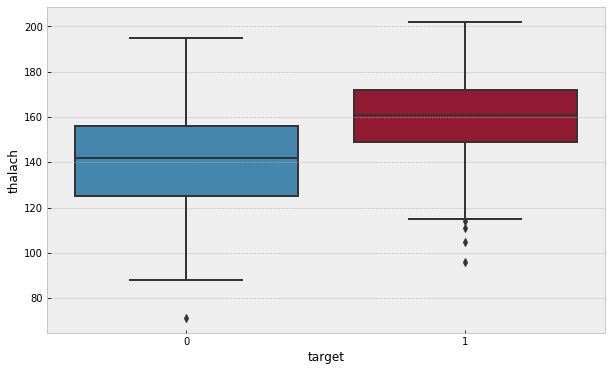

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart <br> rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

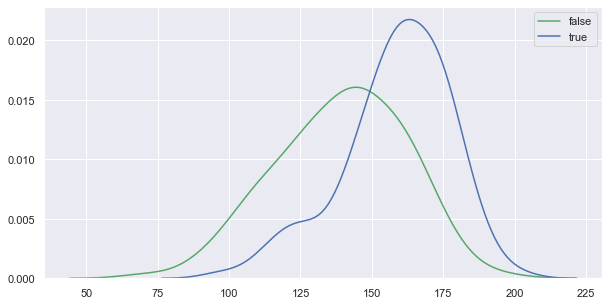

In [25]:
sns.set(rc={'figure.figsize':[10,5]})
sns.kdeplot(df[df['target']==0]['thalach'],color='g',label='false')
sns.kdeplot(df[df['target']==1]['thalach'],color='b',label='true') 

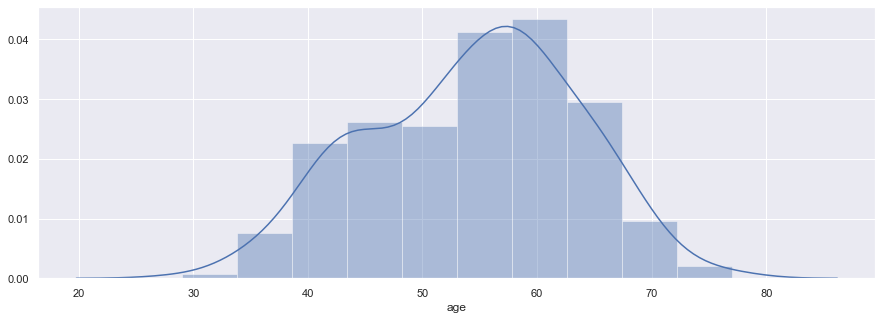

In [26]:
f, ax = plt.subplots(figsize=(15,5))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

The age variable distribution is approximately normal.

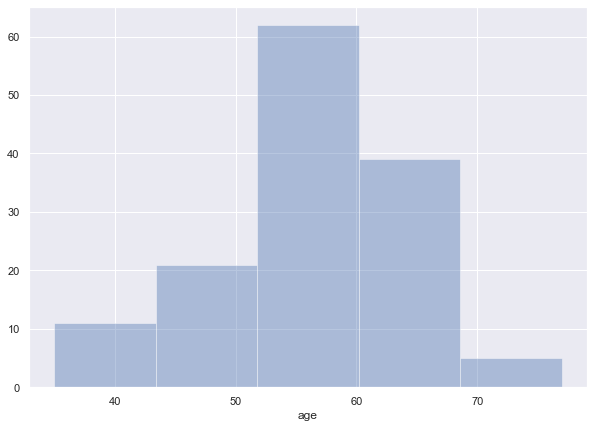

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=5)

Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

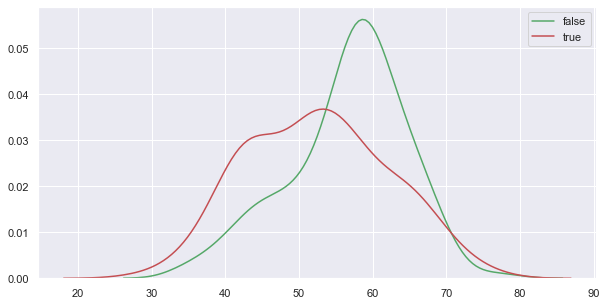

In [28]:
sns.set(rc={'figure.figsize':[10,5]})
sns.kdeplot(df[df['target']==0]['age'],color='g',label='false')
sns.kdeplot(df[df['target']==1]['age'],color='r',label='true')

People whose ages range from 50 to 56 are most likely to develop heart disease<br>
People ages 56 to 61 are the least likely to have heart disease  

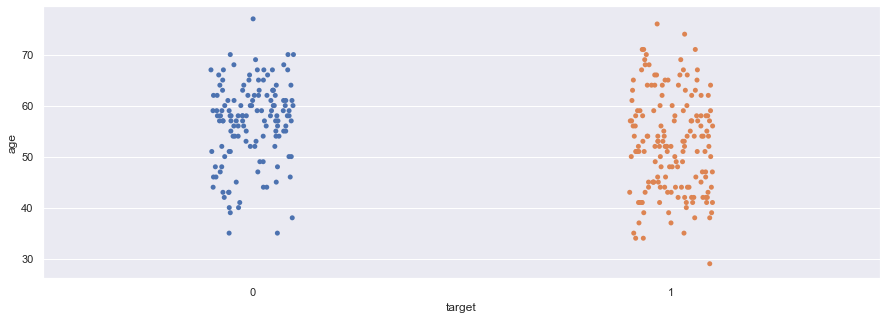

In [29]:
f, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="target", y="age", data=df)
plt.show()

We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

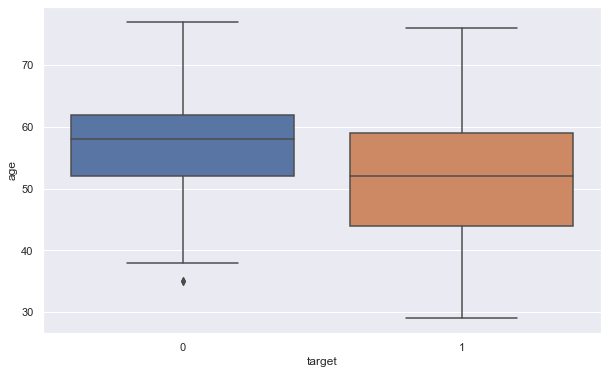

In [30]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

The above boxplot tells two different things :

The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.<br>

The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.

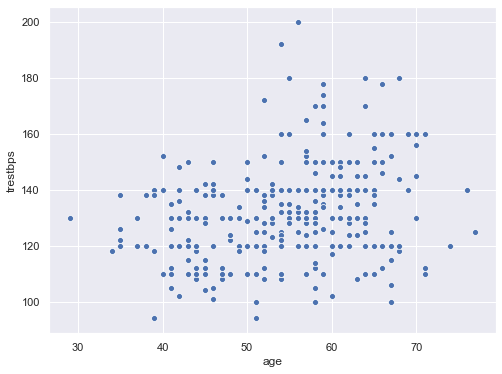

In [31]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()

The above scatter plot shows that there is no correlation between age and trestbps variable.

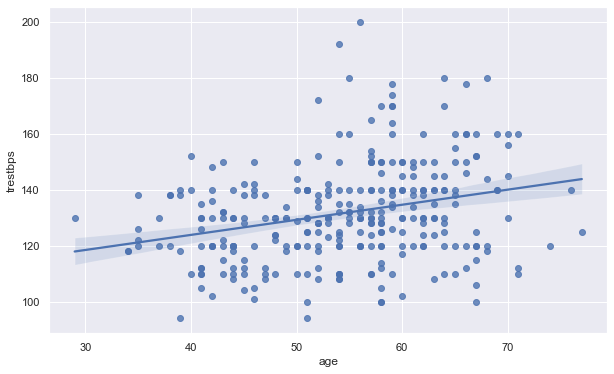

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

he above line shows that linear regression model is not good fit to the data.

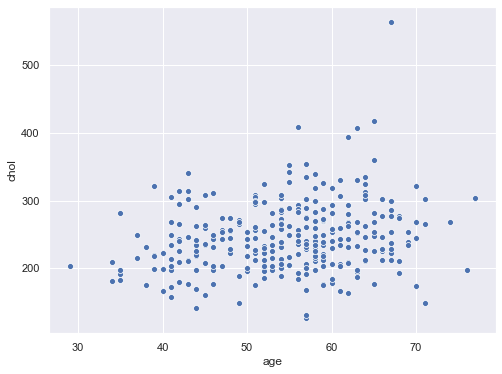

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

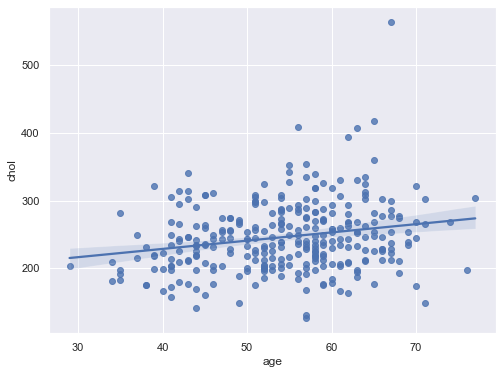

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

The above plot confirms that there is a slighly positive correlation between age and chol variables.

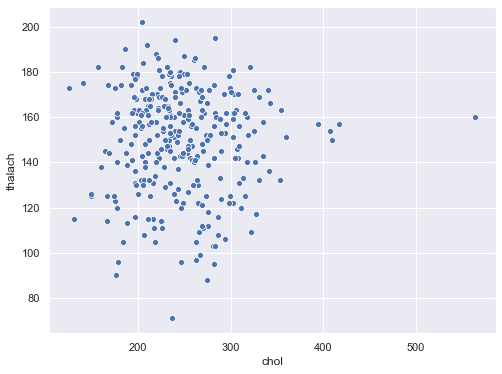

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

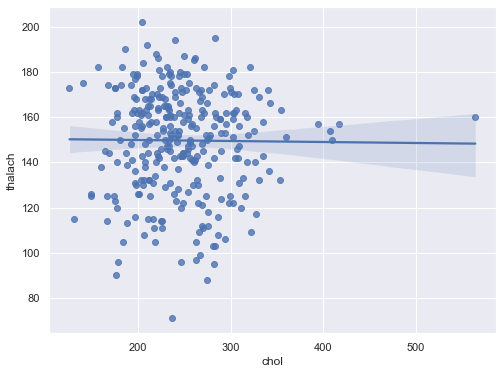

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

The above plot shows that there is no correlation between chol and thalach variable.

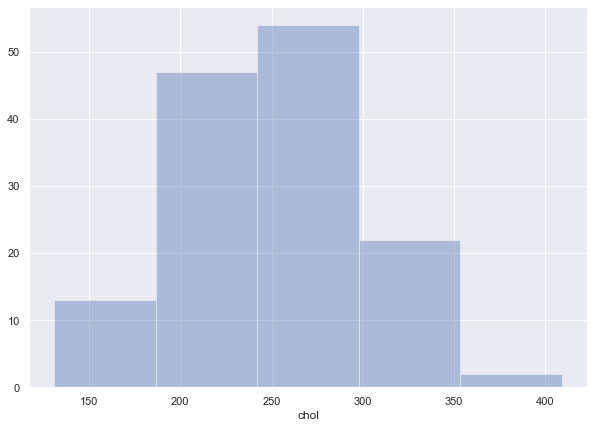

In [37]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=5)

Total cholesterol<br>
LDL — ‘bad cholesterol”<br>
HDL — ‘good cholesterol”<br>
In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above. LDL should contain less than 100 mg / dL of cholesterol. 100 mg / dl rates for individuals without any health issue are appropriate but may be more relevant for those with cardiac problems or risk factors for heart disease. The levels are borderline moderate between 130 and 159 mg / dL and moderate between 160 and 189 mg / dL. The reading is very high at or above 190 mg / dL. Levels of HDL are to be maintained higher. The risk factor for cardiovascular diseases is called a reading less than 40 mg / dL. Borderline low is considered to be between 41 mg / dL and 59 mg / dL. The HDL level can be measured with a maximum of 60 mg / dL.

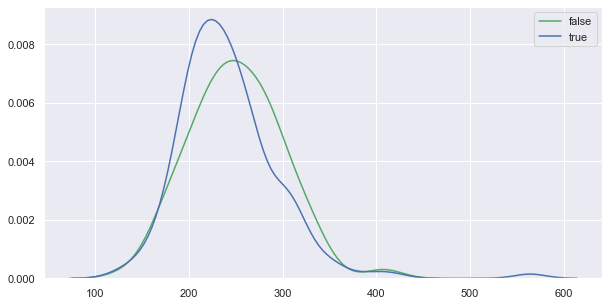

In [38]:
sns.set(rc={'figure.figsize':[10,5]})
sns.kdeplot(df[df['target']==0]['chol'],color='g',label='false')
sns.kdeplot(df[df['target']==1]['chol'],color='b',label='true') 

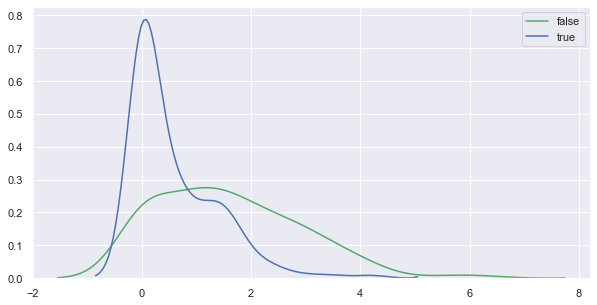

In [39]:
sns.set(rc={'figure.figsize':[10,5]})
sns.kdeplot(df[df['target']==0]['oldpeak'],color='g',label='false')
sns.kdeplot(df[df['target']==1]['oldpeak'],color='b',label='true') 

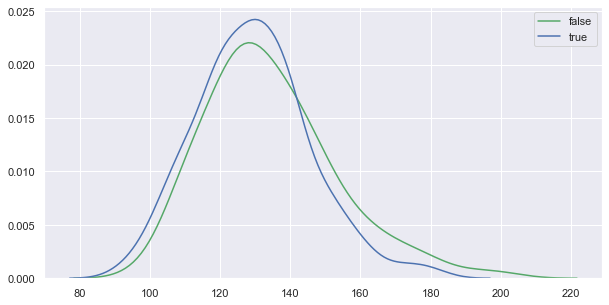

In [40]:
sns.set(rc={'figure.figsize':[10,5]})
sns.kdeplot(df[df['target']==0]['trestbps'],color='g',label='false')
sns.kdeplot(df[df['target']==1]['trestbps'],color='b',label='true') 

Persistent high blood pressure exceeding 140 mm Hg is a chronic condition and may cause many risks and complications. However, blood pressure lower than 120 is a problem as well and may pose many risks

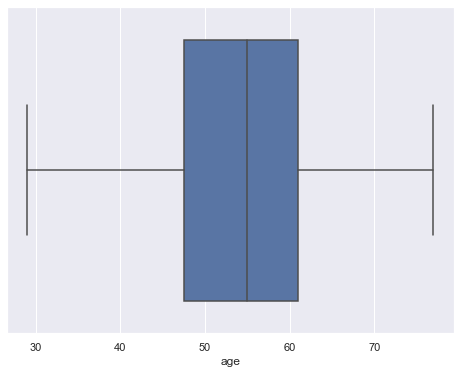

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

The age variable does not contain any outlier.

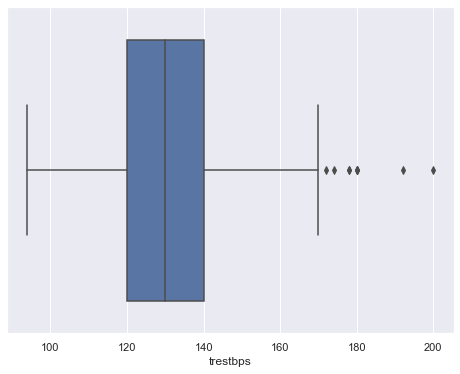

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()

trestbps variable contains outliers to the right side.

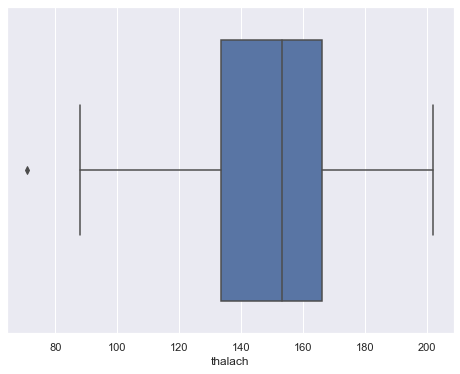

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

thalach variable contains a single outlier to the left side.


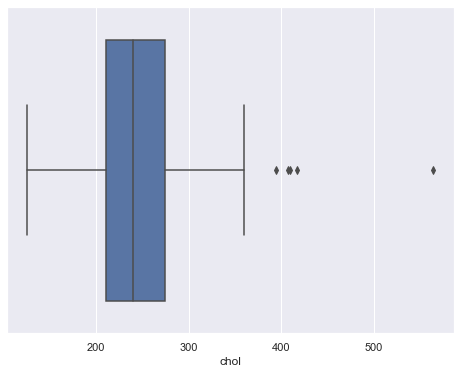

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()

chol variable also contains outliers to the right side.

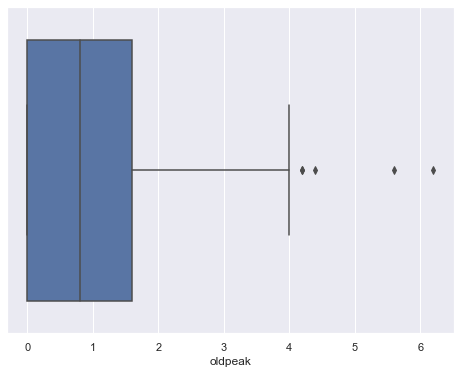

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()

oldpeak variable contains outliers to the right side.


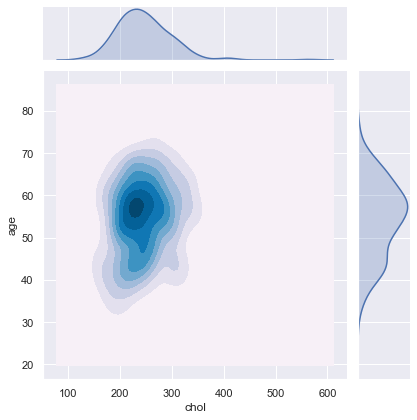

In [46]:
sns.jointplot(data=df, x='chol', y='age', kind='kde',cmap='PuBu' )

Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.

In [47]:
df.loc[df['chol'] == df['chol'].max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


People with high cholesterol have a higher chance of developing heart disease. Let's take a look at heart disease and cholesterol and see how they relate to shape

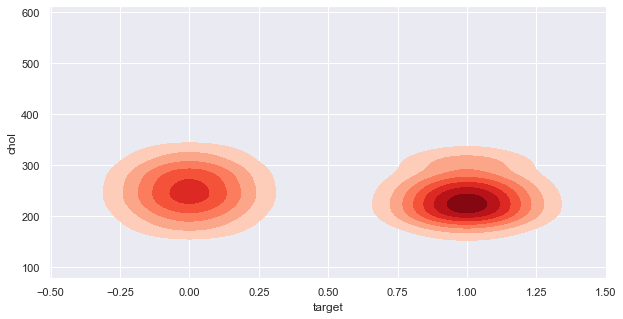

In [48]:
sns.kdeplot(df['target'],df['chol'],cmap="Reds", shade=True, shade_lowest=False)

Most people with similar amounts of cholesterol had the same ranges of heart disease.

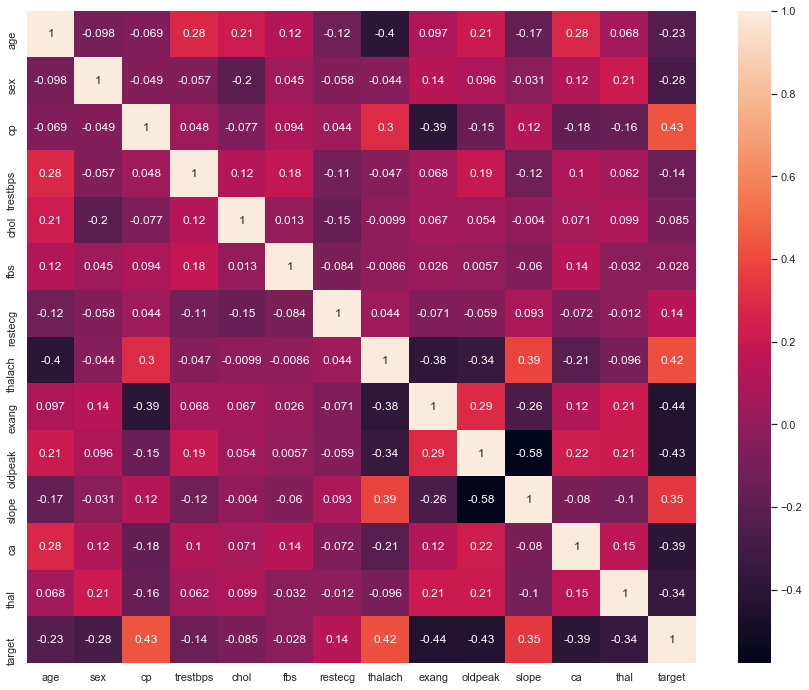

In [49]:
sns.set(rc={'figure.figsize':[15,12]})
sns.heatmap(df.corr(),annot=True)

From the above correlation heat map, we can conclude that :-

- target and cp variable are mildly positively correlated (correlation coefficient = 0.43).

- target and thalach variable are also mildly positively correlated (correlation coefficient = 0.42).

- target and slope variable are weakly positively correlated (correlation coefficient = 0.35).

- target and exang variable are mildly negatively correlated (correlation coefficient = -0.44).

- target and oldpeak variable are also mildly negatively correlated (correlation coefficient = -0.43).

- target and ca variable are weakly negatively correlated (correlation coefficient = -0.39).

- target and thal variable are also waekly negatively correlated (correlation coefficient = -0.34).


# preprocessing steps 

In [50]:
X = df.drop("target", axis = 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
df.isnull().values.any()

False

I don't use Taking care of Categorical Features because there is no string data at any column

In [52]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df.iloc[:,1:-1] = ss.fit_transform(df.iloc[:,1:-1])

print(df)


     age       sex        cp  trestbps      chol       fbs   restecg  \
0     63  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1     37  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2     41 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3     56  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4     57 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..   ...       ...       ...       ...       ...       ...       ...   
298   57 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299   45  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300   68  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301   57  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302   57 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  target  
0    0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.1488

In [53]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RandomForest', RandomForestClassifier())) 
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.838167 (0.096392)
KNN: 0.644333 (0.096082)
CART: 0.726167 (0.102171)
NB: 0.829667 (0.115988)
SVM: 0.541500 (0.024238)
RandomForest: 0.809000 (0.138971)


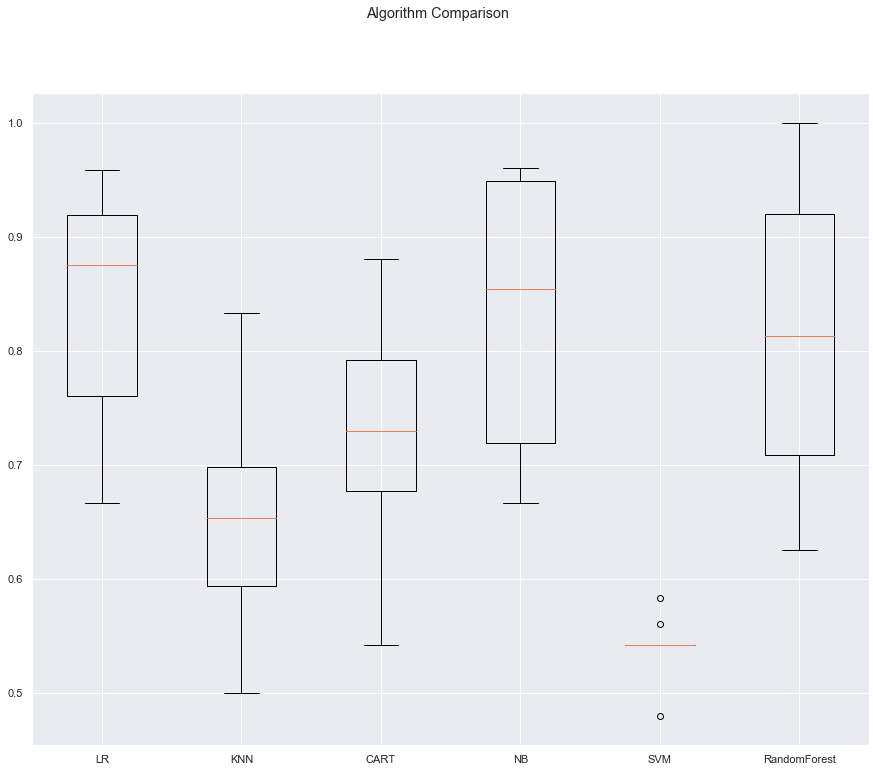

In [54]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Tuning
Select the most appropriate model in terms of accuracy and F1-score

In [55]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
for name, model in models:
    if name=="LR":
        solvers = ['newton-cg', 'lbfgs', 'liblinear']
        penalty = ['l2']
        c_values = [100, 10, 1.0, 0.1, 0.01]
        grid = dict(solver=solvers,penalty=penalty,C=c_values)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    elif name=="KNN":
        n_neighbors = range(1, 21, 2)
        weights = ['uniform', 'distance']
        metric = ['euclidean', 'manhattan', 'minkowski']
        grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    elif name=="SVM":
        kernel = ['poly', 'rbf', 'sigmoid']
        C = [50, 10, 1.0, 0.1, 0.01]
        gamma = ['scale']
        grid = dict(kernel=kernel,C=C,gamma=gamma)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    elif name=="RandomForest":
        n_estimators = [10, 100, 1000]
        max_features = ['sqrt', 'log2']
        # define grid search
        grid = dict(n_estimators=n_estimators,max_features=max_features)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    elif name=="NB":
        cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
        params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
        grid_search = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy') 
    elif name=="CART":
        std_slc = StandardScaler()
        pca = decomposition.PCA()
        pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', model)])
        n_components = list(range(1,X.shape[1]+1,1))
        criterion = ['gini', 'entropy']
        max_depth = [2,4,6,8,10,12]
        parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
        grid_search = GridSearchCV(pipe, parameters)
    grid_result = grid_search.fit(X, y)
    print("Best result in: "+name+" model has accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("\n")


C:\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best result in: LR model has accuracy: 0.838495 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819821 (0.080300) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830789 (0.082154) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.822007 (0.082031) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.820932 (0.079320) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.825305 (0.082251) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.825376 (0.079335) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.825341 (0.078541) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832975 (0.077766) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830753 (0.080386) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.836272 (0.068601) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838495 (0.072669) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837384 (0.073499) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.5s finished


Best result in: NB model has accuracy: 0.839435 using {'var_smoothing': 2.848035868435799e-05}
0.623934 (0.037339) with: {'var_smoothing': 1.0}
0.619563 (0.046245) with: {'var_smoothing': 0.8111308307896871}
0.624991 (0.047538) with: {'var_smoothing': 0.657933224657568}
0.630528 (0.047747) with: {'var_smoothing': 0.533669923120631}
0.639399 (0.052800) with: {'var_smoothing': 0.43287612810830584}
0.641548 (0.048389) with: {'var_smoothing': 0.3511191734215131}
0.650346 (0.044823) with: {'var_smoothing': 0.2848035868435802}
0.655811 (0.049500) with: {'var_smoothing': 0.23101297000831597}
0.656903 (0.048265) with: {'var_smoothing': 0.1873817422860384}
0.663424 (0.045211) with: {'var_smoothing': 0.15199110829529336}
0.672186 (0.051182) with: {'var_smoothing': 0.12328467394420659}
0.679836 (0.047794) with: {'var_smoothing': 0.1}
0.684262 (0.044191) with: {'var_smoothing': 0.08111308307896872}
0.688597 (0.039032) with: {'var_smoothing': 0.0657933224657568}
0.688579 (0.042295) with: {'var_smoo

In [59]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('LR', LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs')))
models.append(('KNN', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 19, weights = 'uniform')))
models.append(('CART', DecisionTreeClassifier( criterion = 'gini',  max_depth = 2 )))
models.append(('NB', GaussianNB(var_smoothing = 2.848035868435799e-05)))
models.append(('SVM', SVC(C = 50, gamma = 'scale', kernel = 'poly')))
models.append(('RandomForestRegressor',RandomForestRegressor(max_features = 'sqrt', n_estimators = 1000)))
results = []
names = [] 
for name, model in models:
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test) 
    y_prediction = []
    for value in y_preds:
        if value > .5:
            y_prediction.append(1)
        else:
            y_prediction.append(0)
    print("model name: "+name+"\n : ,it's score: "+str(f1_score(y_test, y_prediction))+" \\ ")

C:\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


model name: LR
 : ,it's score: 0.8378378378378379 \ 
model name: KNN
 : ,it's score: 0.6176470588235294 \ 
model name: CART
 : ,it's score: 0.7941176470588235 \ 
model name: NB
 : ,it's score: 0.8450704225352113 \ 
model name: SVM
 : ,it's score: 0.7222222222222222 \ 
model name: RandomForestRegressor
 : ,it's score: 0.8450704225352113 \ 


(303, 13)
(303,)
(303, 13)
(303,)
(303, 13)
(303,)
(303, 13)
(303,)
(303, 13)
(303,)
(303, 13)
(303,)


C:\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


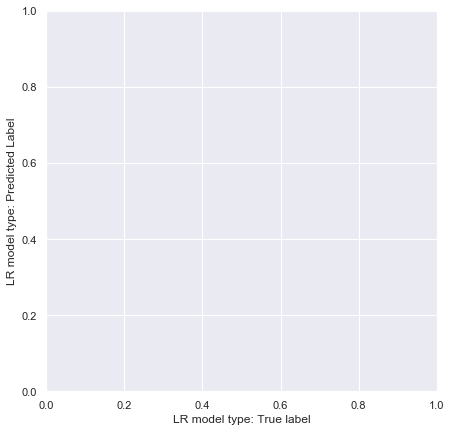

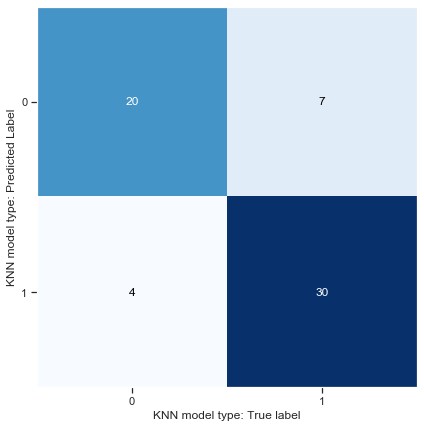

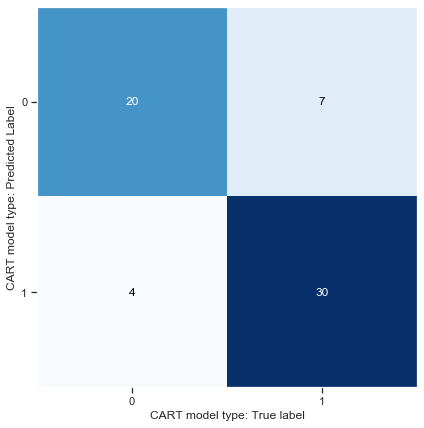

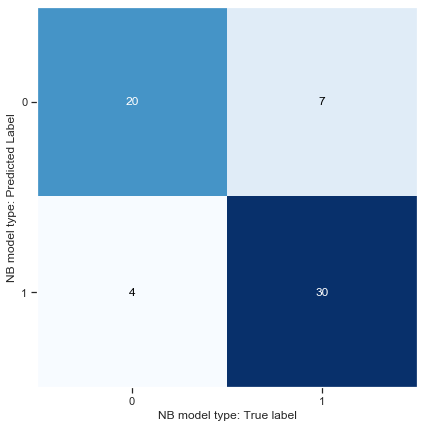

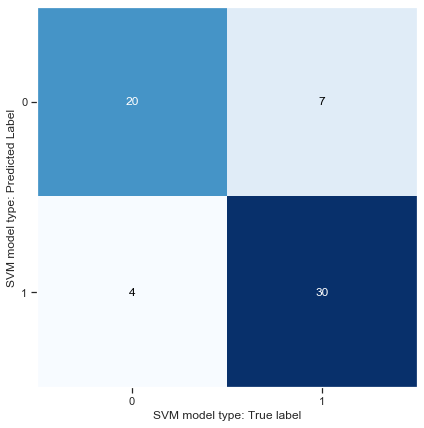

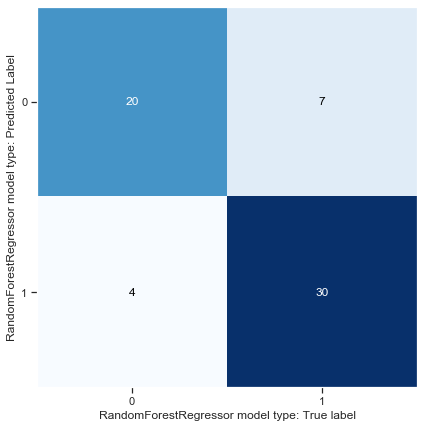

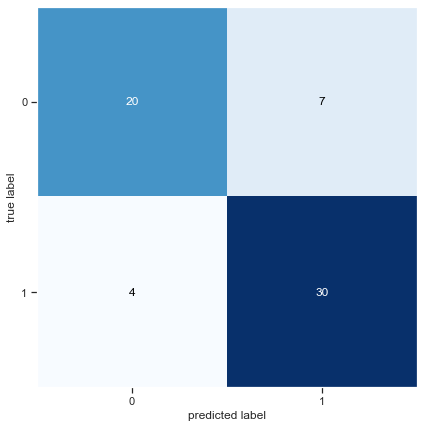

In [61]:
from sklearn.metrics import confusion_matrix,f1_score 
from mlxtend.plotting import plot_confusion_matrix
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':[7,7]}) 
for name, model in models: 
    print(X.shape)
    print(y.shape)
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)    
    plt.xlabel(name+" model type: True label")
    plt.ylabel(name+" model type: Predicted Label") 
    plot_confusion_matrix(confusion_matrix(y_test,y_prediction))

In [62]:
from sklearn import metrics  
lr_model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs') 
   
lr_model.fit(X_train, y_train) 
  
y_pred = lr_model.predict(X_test) 
   
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_prediction)*100) 

Logistic Regression model accuracy(in %): 81.9672131147541


C:\myanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
import pickle 

Pklr_Filename = "saved_model.pk"  

with open(Pklr_Filename, 'wb') as file:  
    pickle.dump(lr_model, file)
with open(Pklr_Filename, 'rb') as file:  
    Pickled_lr_Model = pickle.load(file)
    
save_model=open("finalized_model.sav","wb")
pickle.dump(df,save_model)
len(X_test.iloc[1,:].values)

13